In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)
import scipy 

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


from ipynb.fs.full.CFPCA import CFPCA


In [85]:
import yfinance as yf
import pandas as pd

# Define the start and end dates for the data download
startDate = '2022-09-01'
endDate = '2023-09-01'

# List of tech stock tickers you're interested in
tech_tickers = ['AAPL','MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'INTC', 'CSCO', 'ORCL',
    'SAP', 'ADBE', 'IBM', 'CRM', 'ACN', 'TXN', 'QCOM', 'SHOP', 'ASML', 'AMD',
    'INTU', 'FIS', 'SQ', 'NOW', 'LRCX', 'ADSK', 'MU', 'AMAT', 'UBER',
    'SNAP', 'HPQ', 'DELL', 'ZM', 'DOCU', 'WDAY', 'CDW',
    'CTSH', 'NTAP', 'ANSS', 'TEAM', 'VRSN', 'SWKS', 'MSI', 'AKAM', 'MCHP',
    'WDC', 'IT', 'GLW', 'FTNT', 'GDDY', 'V', 'MA', 'PYPL', 'ADP',
    'NTES', 'BIDU', 'TSM', 'ERIC', 'INFY', 'STM', 'HPE', 'NOK',
    'LYFT', 'PINS', 'SPOT', 'DBX', 'CRWD', 'OKTA', 'ZS', 'SPLK', 'DDOG',
           'LUMN', 'RNG', 'TWLO', 'BOX', 'CYBR', 'PANW',
    'CHKP', 'AVGO', 'JNPR', 'ANET', 'FTV', 'SSNC', 'GIB', 'EPAM', 'NFLX', 'SNOW', 'NET', 'PLTR', 'MDB', 'NXPI', 'MRVL', 'ADI', 'KLAC', 'TER', 'KEYS', 'LITE']

tech_tickers2 = ['MSFT','GOOGL','AMZN', 'CRM','ADBE', 'NOW','INTU', 'TWLO','CRWD', 'OKTA', 'DDOG','SNOW','MDB',
                 'VEEV','ZM','SPLK','NET', 'BILL', 'DOCU','BOX', 'ANSS','NTNX', 
                 'PANW', 'CTLT','ESTC', 'FSLY', 'WDAY','TEAM', 
                 'ZS', 'AAPL', 'HPQ', 'DELL', 'INTC', 'NVDA', 'AMD', 'TXN', 'QCOM', 'ASML', 
        'MU', 'AMAT', 'SWKS', 'MCHP', 'WDC', 'STM', 'AVGO', 'LRCX', 'TSM', 'ERIC', 
        'GLW', 'JNPR', 'ANET', "NXPI", "MRVL", "ADI", "KLAC", "TER", "KEYS", "FTV",
   'AOSL','SMTC', 'MPWR','CRUS','LSCC','ON']



# Download data for all tickers and store closing prices in a DataFrame
# Initialize an empty DataFrame for storing data
tech_df = pd.DataFrame()

for ticker in tech_tickers2:
    # Download the data for the ticker
    data = yf.download(ticker, start=startDate, end=endDate)
    
    # If all_data is empty, initialize it with dates and the first ticker's data
    if tech_df.empty:
        tech_df = pd.DataFrame(data['Close']).rename(columns={'Close': ticker})
    else:
        # For subsequent tickers, just join their closing prices
        tech_df = tech_df.join(pd.DataFrame(data['Close']).rename(columns={'Close': ticker}), how='outer')

# Reset the index to make 'Date' a column
tech_df.reset_index(inplace=True)

# Optional: Rename the 'index' column to 'Date' if it's not already named 'Date'
tech_df.rename(columns={'index': 'Date'}, inplace=True)




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [86]:
import yfinance as yf
import pandas as pd

# Define the start and end dates for the data download
startDate = '2022-09-01'
endDate = '2023-09-01'


nontech_tickers = [
    'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V', 'MA',
    'PG', 'KO', 'PEP', 'MO', 'PM', 'UL', 'JNJ', 'PFE', 'MRK',
    'GSK', 'NVS', 'ABBV', 'ABT', 'AMGN', 'BMY', 'CVS', 'WBA', 'MMM', 'GE',
    'HON', 'UNP', 'UPS', 'CAT', 'DE', 'BA', 'LMT', 'RTX', 'GD', 'NOC',
    'XOM', 'CVX', 'BP', 'SLB', 'COP', 'EOG', 'OXY',
    'WMT', 'COST', 'TGT', 'HD']

# Download data for all tickers and store closing prices in a DataFrame
# Initialize an empty DataFrame for storing data
nontech_df = pd.DataFrame()

for ticker in nontech_tickers:
    # Download the data for the ticker
    data = yf.download(ticker, start=startDate, end=endDate)
    
    # If all_data is empty, initialize it with dates and the first ticker's data
    if nontech_df.empty:
        nontech_df = pd.DataFrame(data['Close']).rename(columns={'Close': ticker})
    else:
        # For subsequent tickers, just join their closing prices
        nontech_df = nontech_df.join(pd.DataFrame(data['Close']).rename(columns={'Close': ticker}), how='outer')

# Reset the index to make 'Date' a column
nontech_df.reset_index(inplace=True)

# Optional: Rename the 'index' column to 'Date' if it's not already named 'Date'
nontech_df.rename(columns={'index': 'Date'}, inplace=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [87]:
groups = {
    'Cloud Computing': [
       'MSFT','GOOGL','AMZN', 'CRM','ADBE', 'NOW','INTU', 'TWLO','CRWD', 'OKTA', 'DDOG','SNOW','MDB',
                 'VEEV','ZM','SPLK','NET', 'BILL', 'DOCU','BOX', 'ANSS','NTNX', 
                 'PANW', 'CTLT','ESTC', 'FSLY', 'WDAY','TEAM', 
                 'ZS'],
    
    'Hardware and Semiconductors': [
        'AAPL', 'HPQ', 'DELL', 'INTC', 'NVDA', 'AMD', 'TXN', 'QCOM', 'ASML', 
        'MU', 'AMAT', 'SWKS', 'MCHP', 'WDC', 'STM', 'AVGO', 'LRCX', 'TSM', 'ERIC', 
        'GLW', 'JNPR', 'ANET', "NXPI", "MRVL", "ADI", "KLAC", "TER", "KEYS", "FTV",
   'AOSL','SMTC', 'MPWR','CRUS','LSCC','ON'
]
}

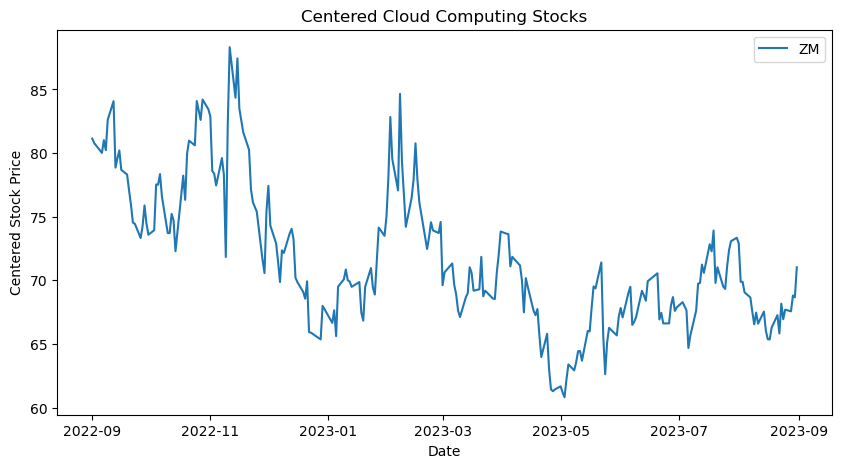

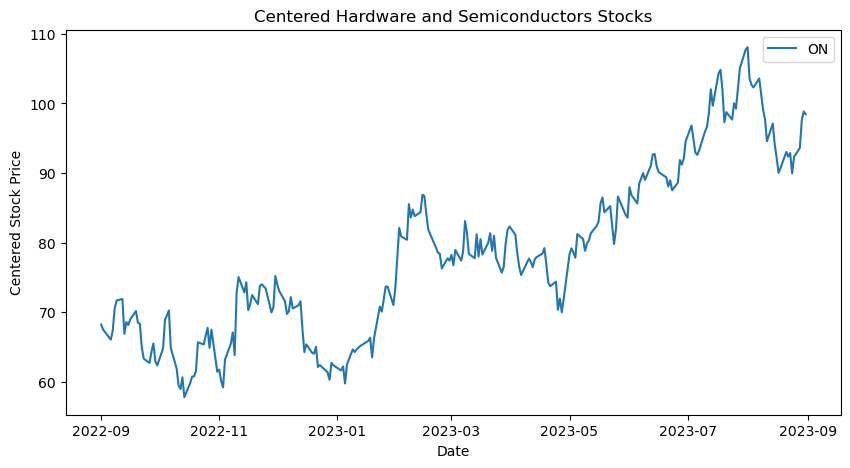

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot centered stocks
def plot_centered_stocks(tech_df, groups, center_by_time=False):
    # Centering the data
    centered_df = tech_df.copy()
    if center_by_time:
        centered_df.iloc[:, 1:] = tech_df.iloc[:, 1:].apply(lambda x: x - x.mean(), axis=1)

    
    # Selecting a couple of centered stocks from each group
    cloud_stocks = ['ZM']
    hardware_stocks = ['ON']
    
    # Plotting centered stocks from Cloud Computing group
    plt.figure(figsize=(10, 5))
    for stock in cloud_stocks:
        plt.plot(centered_df['Date'], centered_df[stock], label=stock)
    plt.title('Centered Cloud Computing Stocks')
    plt.xlabel('Date')
    plt.ylabel('Centered Stock Price')
    plt.legend()
    plt.show()

    # Plotting centered stocks from Hardware and Semiconductors group
    plt.figure(figsize=(10, 5))
    for stock in hardware_stocks:
        plt.plot(centered_df['Date'], centered_df[stock], label=stock)
    plt.title('Centered Hardware and Semiconductors Stocks')
    plt.xlabel('Date')
    plt.ylabel('Centered Stock Price')
    plt.legend()
    plt.show()

# Assuming you have already defined your DataFrame tech_df and groups dictionary
plot_centered_stocks(tech_df, groups, center_by_time=False)


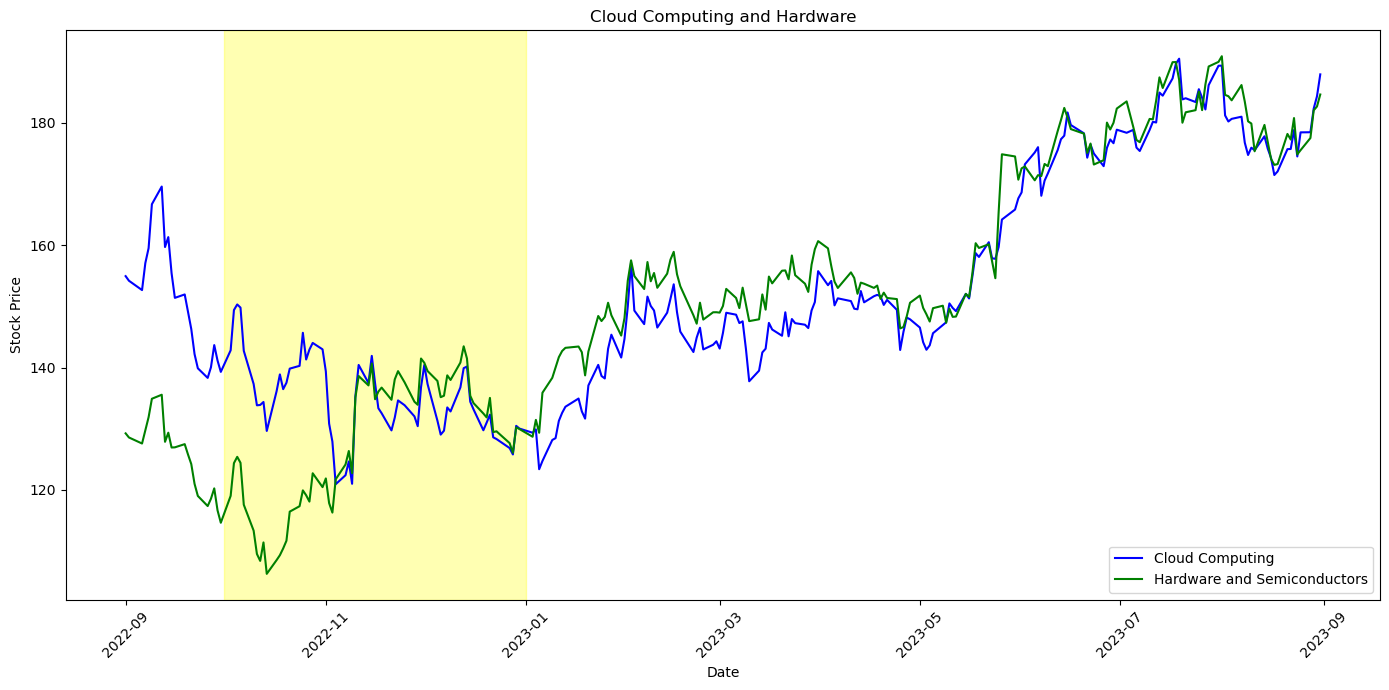

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming tech_df is your DataFrame and groups is a dictionary as described

# Filter data for 'Cloud Computing'
filtered_cloud_df = tech_df[groups['Cloud Computing']]
# Filter data for 'Hardware and Semiconductors'
filtered_hardware_df = tech_df[groups['Hardware and Semiconductors']]

plt.figure(figsize=(14, 7))

# Plotting the mean for Cloud Computing
plt.plot(tech_df['Date'], filtered_cloud_df.mean(axis=1), label='Cloud Computing', color='blue')

# Plotting the mean for Hardware and Semiconductors
plt.plot(tech_df['Date'], filtered_hardware_df.mean(axis=1), label='Hardware and Semiconductors', color='green')

# Highlighting a specific period for both groups
plt.axvspan('2022-10-01', '2023-01-01', color='yellow', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Cloud Computing and Hardware')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


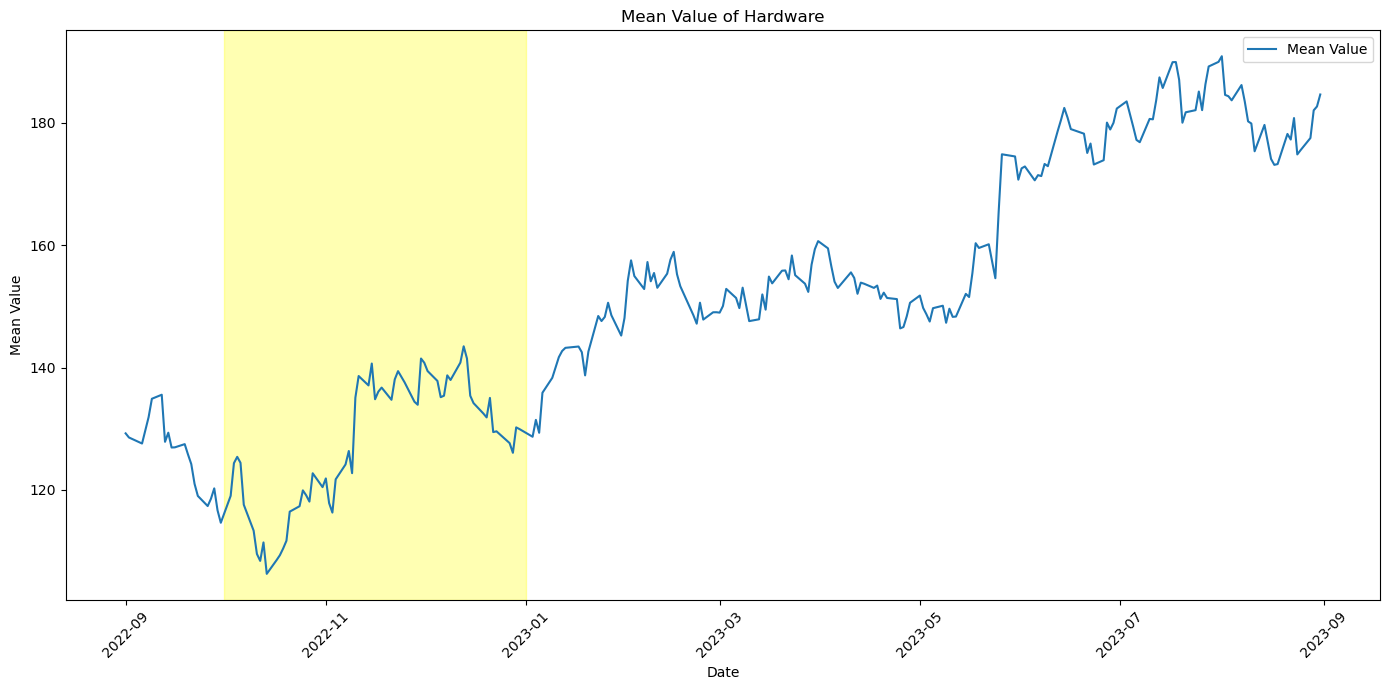

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


filtered_df = tech_df[groups['Hardware and Semiconductors']]

plt.figure(figsize=(14, 7))

# Plotting the mean
plt.plot(tech_plot['Date'], filtered_df.mean(axis=1), label='Mean Value')

# If you want to highlight a specific period on the graph
plt.axvspan('2022-10-01', '2023-01-01', color='yellow', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Mean Value of Hardware')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



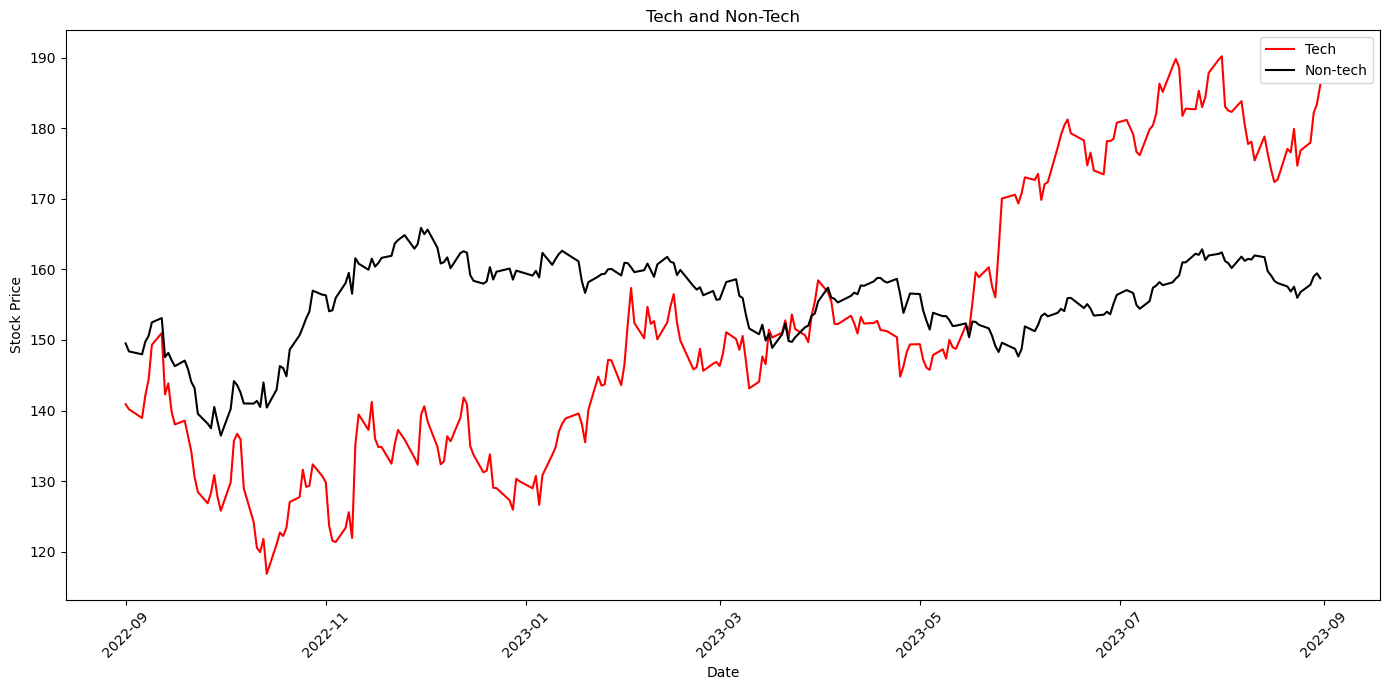

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(14, 7))

filtered_df = tech_df
filtered_df['Mean'] = filtered_df[filtered_df.columns[1:]].mean(axis=1)
# Plotting the mean
plt.plot(filtered_df['Date'], filtered_df['Mean'], label='Tech', color = "red")

# If you want to highlight a specific period on the graph
# plt.axvspan('2023-01-01', '2023-05-31', color='yellow', alpha=0.3)

nontech_plot = nontech_df

# Calculate the mean of the selected columns
nontech_plot['Mean'] = nontech_plot[nontech_plot.columns[1:]].mean(axis=1)

# Plot the mean of the selected columns
plt.plot(nontech_plot['Date'], nontech_plot['Mean'], label='Non-tech', color = "black")



plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Tech and Non-Tech')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


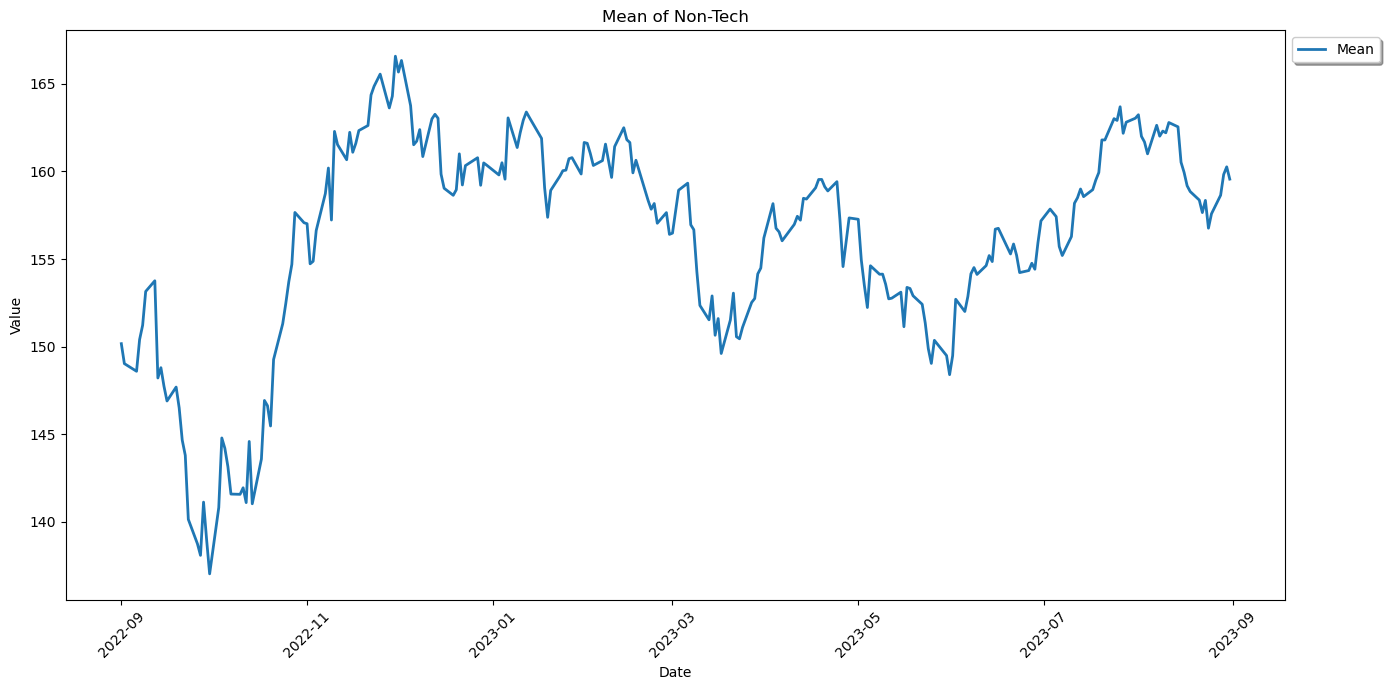

In [19]:
import matplotlib.pyplot as plt

nontech_plot = nontech_df

# Calculate the mean of the selected columns
nontech_plot['Mean'] = nontech_plot[nontech_plot.columns[1:]].mean(axis=1)

# Plot individual lines for selected columns
plt.figure(figsize=(14, 7))

# Plot the mean of the selected columns
plt.plot(nontech_plot['Date'], nontech_plot['Mean'], label='Mean', linewidth=2)

# Use bbox_to_anchor to position the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
plt.title("Mean of Non-Tech")
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [20]:
standardized_df.columns

Index(['Date', 'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V', 'MA', 'PG',
       'KO', 'PEP', 'MO', 'PM', 'UL', 'JNJ', 'PFE', 'MRK', 'GSK', 'NVS',
       'ABBV', 'ABT', 'AMGN', 'BMY', 'CVS', 'WBA', 'MMM', 'GE', 'HON', 'UNP',
       'UPS', 'CAT', 'DE', 'BA', 'LMT', 'RTX', 'GD', 'NOC', 'XOM', 'CVX', 'BP',
       'SLB', 'COP', 'EOG', 'OXY', 'WMT', 'COST', 'TGT', 'HD'],
      dtype='object')

In [6]:
import pandas as pd
import os

# Initialize an empty DataFrame for the final result
nontech = pd.DataFrame()

# Path to the 'tech' folder
folder_path = 'nontech2/'

# Iterate over each file in the 'tech' folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        # Read the CSV file
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)

        # Keep only the 'Date' and 'Open' columns
        df = df[['Date', 'Open']]

        # Rename the 'Open' column to the name of the file (without '.csv')
        df.rename(columns={'Open': file.rstrip('.csv')}, inplace=True)

        # If 'tech' DataFrame is empty, initialize it with the data from the first file
        if nontech.empty:
            nontech = df
        else:
            # Merge with the existing 'tech' DataFrame on the 'Date' column
            nontech = pd.merge(nontech, df, on='Date', how='outer')
nontech['Date'] = pd.to_datetime(nontech['Date'])

nontech.sort_values(by='Date', ascending = True, inplace = True)
#nontech = nontech[nontech['Date'] <= pd.Timestamp('2023-01-03')]
nontech

,Date,BA,CAT,CVX,DIS,F,GE,GM,GS,HD,...,JPM,KO,MCD,MMM,MRK,PFE,PG,UNH,WMT,XOM
251,2022-09-01,158.00,182.27,156.48,111.79,15.10,57.16,37.81,329.87,288.40,...,113.29,61.58,251.82,124.30,85.64,45.14,137.83,519.33,132.54,94.42
250,2022-09-02,155.19,184.85,158.24,113.05,15.53,57.58,39.32,334.68,296.11,...,115.87,62.39,257.41,126.03,87.24,46.74,140.42,529.62,134.85,96.35
249,2022-09-06,152.39,182.90,159.89,111.77,15.22,56.57,38.81,332.32,293.22,...,114.33,61.29,254.47,121.36,86.58,45.96,135.88,519.93,133.05,96.16
248,2022-09-07,151.26,179.11,154.06,109.87,14.91,56.11,38.52,324.25,290.44,...,113.13,61.32,255.14,116.64,86.56,45.70,136.03,517.00,133.06,93.19
247,2022-09-08,155.00,179.68,155.59,111.07,15.16,56.61,39.45,330.29,296.00,...,115.28,62.08,257.85,118.39,86.50,46.02,137.01,520.95,135.40,94.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-08-28,224.21,273.50,159.53,83.83,11.95,112.55,33.26,321.34,323.20,...,147.57,60.55,284.58,105.31,110.23,36.44,153.71,490.49,157.86,108.45
3,2023-08-29,225.88,275.00,160.91,83.79,11.95,113.67,33.22,325.56,326.79,...,147.71,60.56,283.95,104.99,109.28,36.26,153.95,491.47,159.00,109.66
2,2023-08-30,227.08,280.03,160.59,84.40,12.07,114.85,33.46,330.00,328.00,...,148.62,60.64,283.80,105.49,110.30,36.18,154.10,493.99,160.40,110.44
1,2023-08-31,229.33,283.64,161.01,84.46,12.13,114.58,33.51,329.41,331.20,...,148.26,60.30,283.21,105.94,110.12,35.94,154.12,492.36,161.12,111.12


In [36]:
len(tech_df.columns)

66

In [89]:
# Create a list of lists, each sublist is a column excluding 'Day of Year'
tech_list = [tech_df[column].tolist() for column in tech_df.columns if column != 'Date']
nontech_list = [nontech_df[column].tolist() for column in nontech_df.columns if column != 'Date']

In [41]:
len(tech_list)

64

C:\Users\Eric\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


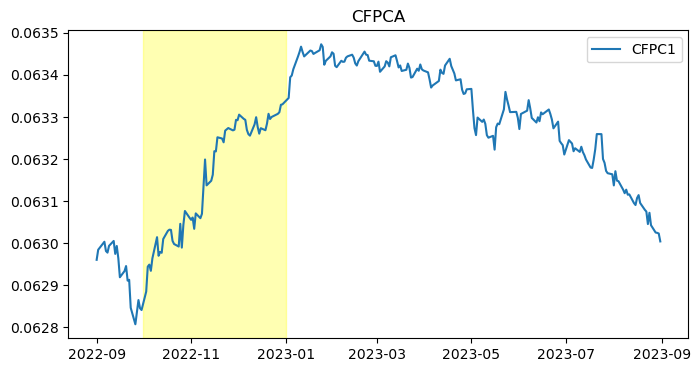

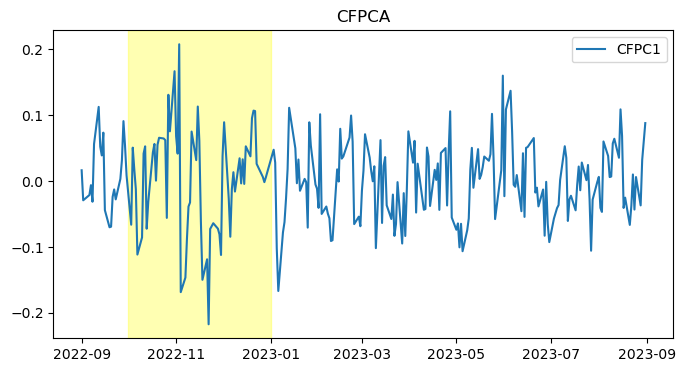

In [90]:
import numpy as np

def standardize_time_series(data_list, log_transform, individual, across_time_points):
    """
    Standardize time series data based on selected options.

    Parameters:
    - data_list: List of lists, where each inner list represents a time series.
    - log_transform: Boolean, if True, apply log transformation to the data before standardizing.
    - individual: Boolean, if True, standardize each time series individually.
    - across_time_points: Boolean, if True, standardize across all time points.

    Returns:
    - List of standardized time series data.
    """

    # Apply log transformation if requested
    if log_transform:
        data_list = np.log1p(data_list)

    if individual:
        # Standardize each series individually
        standardized_data = [(series - np.mean(series)) / np.std(series) for series in data_list]
    
    elif across_time_points:
        # Convert to NumPy array for easier manipulation
        data_array = np.array(data_list)
        # Standardize across all time points
        means = np.mean(data_array, axis=0)
        stds = np.std(data_array, axis=0)
        standardized_data = (data_array - means) / stds
        standardized_data = standardized_data.tolist()
    
    else:
        # Default behavior if neither individual nor across_time_points is specified
        raise ValueError("Either 'individual' or 'across_time_points' must be True.")

    return standardized_data



def compute_and_plot_components(foreground, background, alpha):
    # Define time points
    t = np.linspace(0, 250, 251)
    fd_X = skfda.FDataGrid(foreground, t)
    fd_Y = skfda.FDataGrid(background, t)
    basis = skfda.representation.basis.BSplineBasis(n_basis=7)
    X_basis = fd_X.to_basis(basis)
    Y_basis = fd_Y.to_basis(basis)

    X_fd_data = fd_X.data_matrix.reshape(fd_X.data_matrix.shape[:-1])
    Y_fd_data = fd_Y.data_matrix.reshape(fd_Y.data_matrix.shape[:-1])

    X_identity = np.eye(len(fd_X.grid_points[0]))
    Y_identity = np.eye(len(fd_Y.grid_points[0]))

    X_weights = scipy.integrate.simpson(X_identity, fd_X.grid_points[0])
    Y_weights = scipy.integrate.simpson(Y_identity, fd_Y.grid_points[0])

    X_weights_matrix = np.diag(X_weights)
    Y_weights_matrix = np.diag(Y_weights)

    X_factorization_matrix = X_weights_matrix.astype(float)
    Y_factorization_matrix = Y_weights_matrix.astype(float)

    X_Lt = np.linalg.cholesky(X_factorization_matrix).T
    Y_Lt = np.linalg.cholesky(Y_factorization_matrix).T

    new_data_matrix_X = X_fd_data @ X_weights_matrix
    new_data_matrix_X = np.linalg.solve(X_Lt.T, new_data_matrix_X.T).T

    new_data_matrix_Y = Y_fd_data @ Y_weights_matrix
    new_data_matrix_Y = np.linalg.solve(Y_Lt.T, new_data_matrix_Y.T).T
    
    X_centered = new_data_matrix_X
    Y_centered = new_data_matrix_Y

    # Center the matrix X by subtracting the mean of each column
   # X_centered = new_data_matrix_X - np.mean(new_data_matrix_X, axis=0)
   # Y_centered = new_data_matrix_Y - np.mean(new_data_matrix_Y, axis=0)

    Vx = (1 / (len(foreground) - 1)) * np.dot(X_centered.T, X_centered)
    Vy = (1 / (len(background) - 1)) * np.dot(Y_centered.T, Y_centered)

    # Perform the eigen decomposition on the covariance matrix V
    eigenvalues, eigenvectors = np.linalg.eig(Vx - alpha * Vy)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    components = np.linalg.solve(X_Lt, sorted_eigenvectors[:, :5]).T

    # Plot the first three components
    plt.figure(figsize=(8, 4))
    for i in range(1):
        plt.plot(tech_df['Date'],components[i], label=f'Component {i+1}')
    #plt.legend()
    plt.axvspan('2022-10-01', '2023-01-01', color='yellow', alpha=0.3)

    plt.title('CFPCA')
    plt.legend(['CFPC1'])
    plt.show()

    return components

standardized_tech_list = standardize_time_series(tech_list, log_transform=True, individual=False, across_time_points = True)
standardized_nontech_list = standardize_time_series(nontech_list, log_transform=True, individual=False, across_time_points=True)


# Example usage:
shared_components = compute_and_plot_components(standardized_nontech_list,standardized_tech_list , 0)
unique_components = compute_and_plot_components(standardized_tech_list, standardized_nontech_list, 60)

#NON PERIODIC CASE

In [91]:
sorted_eigenvectors = CFPCA(standardized_tech_list,standardized_nontech_list,30,t)


In [92]:

X = np.array(standardized_tech_list)
Y = np.array(standardized_nontech_list)
t = np.linspace(0, 250, 251)
w = 250/251
X = X - np.mean(X, axis = 0)
Y = Y - np.mean(Y, axis = 0)


Vx = (1/(len(X)-1)) * np.dot(X.T, X)
Vy = (1/(len(Y)-1)) * np.dot(Y.T, Y)


# Perform the eigen decomposition on the covariance matrix V
eigenvalues, eigenvectors = np.linalg.eig(w*(Vx-30*Vy))

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


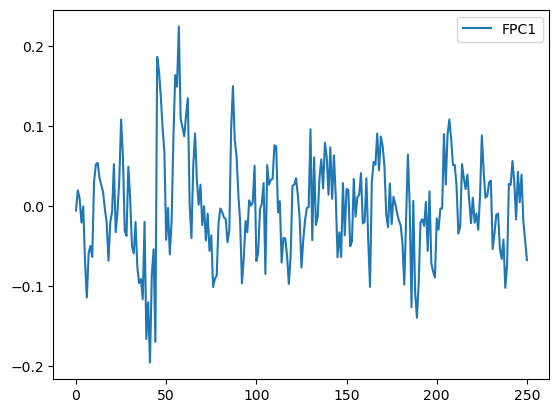

In [93]:
plt.plot(t, sorted_eigenvectors[:,0])
#plt.plot(t, sorted_eigenvectors[:,1])
#plt.plot(t, (w**(-0.5))*sorted_eigenvectors[:,2])
#plt.plot(t, (w**(-0.5))*sorted_eigenvectors[:,3])
plt.legend(['FPC1', 'FPC2'], loc = "upper right")

C:\Users\Eric\anaconda3\Lib\site-packages\pandas\core\window\rolling.py:404: ComplexWarning: Casting complex values to real discards the imaginary part
  values = ensure_float64(values)


Text(0.5, 1.0, 'FPCA')

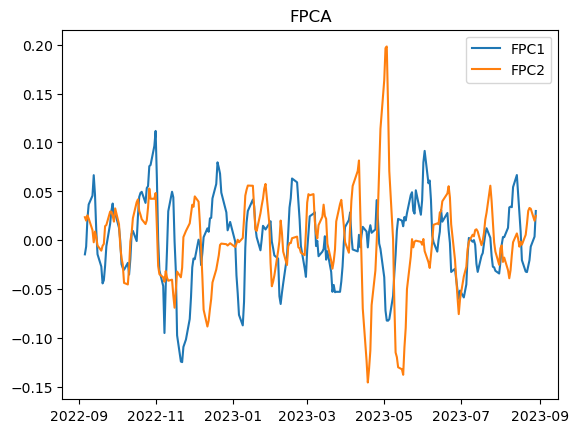

In [94]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d

def smooth_time_series_with_ema_and_gaussian(components, window_size=10, alpha=0.3):
    """
    Smooths each time series in the components list using both an Exponential Moving Average and a Gaussian filter.
    
    Args:
    - components: A list of time series (each time series is a list or a pandas Series).
    - window_size: The window size for the simple moving average and the Gaussian filter.
    - alpha: The smoothing factor for exponential moving average, between 0 and 1.
    
    Returns:
    A dictionary with keys 'sma', 'ema', and 'gaussian' containing lists of smoothed time series using each method.
    """
    smoothed_components = {'sma': [], 'ema': [], 'gaussian': []}
    for series in components:
        if not isinstance(series, pd.Series):
            series = pd.Series(series)
        
        # Simple Moving Average with larger window
        smoothed_sma = series.rolling(window=window_size, center=True).mean()
        
        # Exponential Moving Average
        smoothed_ema = series.ewm(alpha=alpha, adjust=False).mean()
        
        # Gaussian filter
        smoothed_gaussian = pd.Series(gaussian_filter1d(series, sigma=window_size/2))
        
        smoothed_components['sma'].append(smoothed_sma)
        smoothed_components['ema'].append(smoothed_ema)
        smoothed_components['gaussian'].append(smoothed_gaussian)
    
    return smoothed_components

# Example usage
components = [unique_components[0], unique_components[1], unique_components[2], unique_components[3]]  # Assuming components is already defined
smoothed_components = smooth_time_series_with_ema_and_gaussian(components, window_size=5, alpha=0.3)
plt.plot(tech_df['Date'],smoothed_components['sma'][0])
plt.plot(tech_df['Date'],smoothed_components['sma'][1])
plt.legend(['FPC1', 'FPC2'])
plt.title("FPCA")
#plt.plot(tech_plot['Date'],smoothed_components['gaussian'][2])

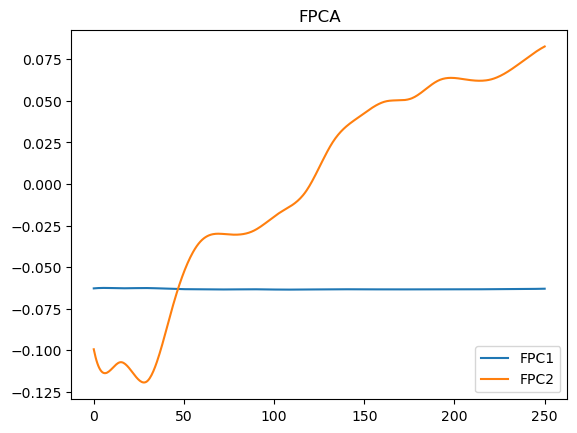

In [41]:
# Plot FPCA components
t = np.linspace(0, 250, 251)
residuals_fd = skfda.FDataGrid(standardized_tech_list, t)

# Convert to Fourier basis representation
basis = BSplineBasis(n_basis=20)
basis_fd = residuals_fd.to_basis(basis)

# Perform FPCA on the residuals in basis representation
fpca = FPCA(n_components=2, components_basis=basis)
fpca.fit(basis_fd)


fpca.components_.plot()
plt.title("FPCA")
plt.legend(["FPC1", "FPC2"], loc="lower right")
plt.show()

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps


def calculate_pc_scores_from_lists(data_lists, eigenvector, t):
    """
    Calculate the PC scores for each time series represented by a list in data_lists.
    
    Parameters:
    - data_lists: List of lists, each inner list is a time series for a company.
    - eigenvector: The eigenvector to use for calculating PC scores.
    - t: The time array over which to integrate.
    
    Returns:
    - A numpy array with PC scores for each time series.
    """
    # Convert data lists to a numpy array for efficient computation
    data_array = np.array(data_lists)
    
    # Calculate the integral using the trapezoidal rule for each time series
    pc_scores = np.array([simps(data_array[i] * np.real(eigenvector), dx = 1) for i in range(data_array.shape[0])])
    return pc_scores

unique_pc_score1 = calculate_pc_scores_from_lists(standardized_tech_list, sorted_eigenvectors[:,0], t)
unique_pc_score2 = calculate_pc_scores_from_lists(standardized_tech_list, sorted_eigenvectors[:,1], t)



In [67]:
len(unique_pc_score2)

64

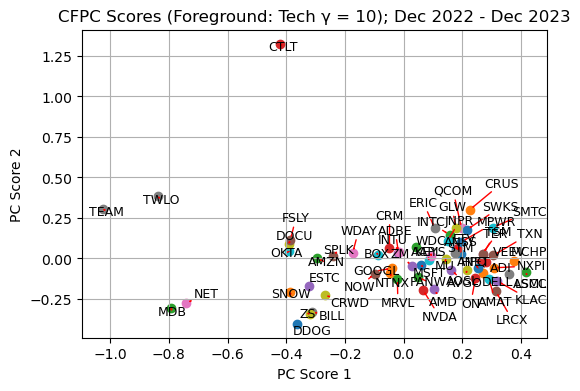

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

tech_company_names = list(tech_df.columns[1:])

# Placeholder for calculation function (ensure it's defined in your environment)

def plot_pc_scores_with_labels(pc_scores1, pc_scores2, labels, title="CFPC Scores (Foreground: Tech \u03b3 = 10); Dec 2022 - Dec 2023"):
    plt.figure(figsize=(6, 4))  # Adjusted for better visibility of labels
    texts = []  # List to store all the text objects for adjust_text
    for i, label in enumerate(labels):
        plt.scatter(pc_scores1[i], pc_scores2[i], label=label)  # Label only one set for legend clarity
        texts.append(plt.text(pc_scores1[i], pc_scores2[i], label, fontsize=9))
    plt.xlabel('PC Score 1')
    plt.ylabel('PC Score 2')
    plt.title(title)
    plt.grid(True)  # Optional: Adds a grid for better readability
    
    # Use adjust_text to minimize text overlaps
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

    plt.show()

# Assuming calculation of PC scores from earlier example
# tech_pc_score1, tech_pc_score2
# nontech_pc_score1, nontech_pc_score2

# Combine PC scores and labels


# Plot the combined PC scores with labels
plot_pc_scores_with_labels(unique_pc_score1, unique_pc_score2, tech_company_names)


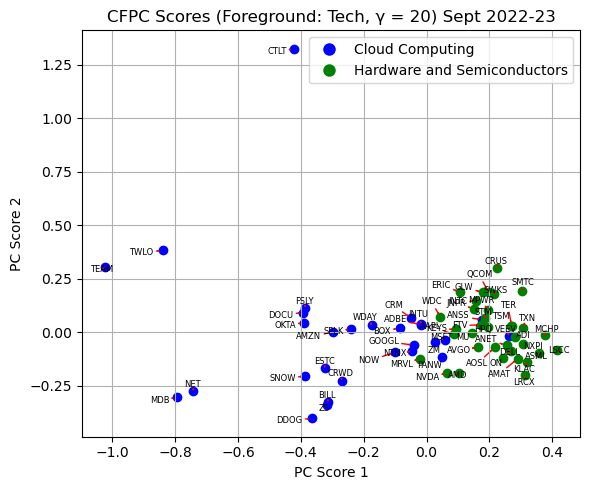

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.lines import Line2D

# Assuming tech_pc_score1, tech_pc_score2, and tech_company_names are defined elsewhere in your code

# Define the groups with their respective companies
groups = {
    'Cloud Computing': [
       'MSFT','GOOGL','AMZN', 'CRM','ADBE', 'NOW','INTU', 'TWLO','CRWD', 'OKTA', 'DDOG','SNOW','MDB',
                 'VEEV','ZM','SPLK','NET', 'BILL', 'DOCU','BOX', 'ANSS','NTNX', 
                 'PANW', 'CTLT','ESTC', 'FSLY', 'WDAY','TEAM', 
                 'ZS'],
    
    'Hardware and Semiconductors': [
        'AAPL', 'HPQ', 'DELL', 'INTC', 'NVDA', 'AMD', 'TXN', 'QCOM', 'ASML', 
        'MU', 'AMAT', 'SWKS', 'MCHP', 'WDC', 'STM', 'AVGO', 'LRCX', 'TSM', 'ERIC', 
        'GLW', 'JNPR', 'ANET', "NXPI", "MRVL", "ADI", "KLAC", "TER", "KEYS", "FTV",
   'AOSL','SMTC', 'MPWR','CRUS','LSCC','ON'
]
}

group_colors = {
    'Cloud Computing': 'blue',
    'Hardware and Semiconductors': 'green',
}

# Function to find the group color for each company
def find_group_color(company):
    for group, companies in groups.items():
        if company in companies:
            return group_colors[group]
    return 'gray'  # Default color if company is not found in any group

#(Tech: \u03b3 = 20) 
# Plotting function
# Adjusted function to plot PC scores with labels
def plot_pc_scores_with_labels(pc_scores1, pc_scores2, labels, title="CFPC Scores (Foreground: Tech, \u03b3 = 20) Sept 2022-23"):
    plt.figure(figsize=(6, 5))
    texts = []
    
    # Plot each company
    for i, label in enumerate(labels):
        color = find_group_color(label)
        plt.scatter(pc_scores1[i], pc_scores2[i], color=color)
        texts.append(plt.text(pc_scores1[i], pc_scores2[i], label, fontsize=6, ha='right'))
    
    # Create legend items
    legend_items = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=group) for group, color in group_colors.items()]
   # plt.legend(handles=legend_items, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.xlabel('PC Score 1')
    plt.ylabel('PC Score 2')
    plt.title(title)
    plt.grid(True)
    plt.legend(handles=legend_items, loc='best')    
    plt.tight_layout()
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

    # Place the text inside the plot
    # Determine appropriate coordinates based on your data range
    text_x = max(pc_scores1) * 2.7  # Adjust as needed
    text_y = max(pc_scores2) * 0.1  # Adjust as needed
    
    text_a = max(pc_scores1) * 2.7  # Adjust as needed
    text_b = max(pc_scores2) * 0.5  # Adjust as needed
    
   # plt.text(text_x, text_y, "Silhouette Score: " + str(round(silhouette_avg,3)), fontsize=12, ha='right', va='bottom', 
       #      bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
   # plt.text(text_a, text_b, "Davies-Bouldin Score: " + str(round(db_avg,3)), fontsize=12, ha='right', va='bottom', 
        #     bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
    plt.show()


X = np.column_stack((unique_pc_score1, unique_pc_score2))

# Assuming tech_company_tickers is a list of company tickers in the same order as they appear in X
tech_company_tickers = tech_company_names  # Replace [...] with your actual list of tickers

# Generate a single list of all tickers in the order defined by the groups variable for consistency
ordered_group_tickers = []
for group in groups.values():
    ordered_group_tickers.extend(group)

# Create a mapping of tickers to their group index based on the ordered list
ticker_to_group_index = {ticker: group_idx for group_idx, tickers in enumerate(groups.values()) for ticker in tickers}

# Create labels for each company based on its group, preserving the order of tech_company_tickers
labels = np.array([ticker_to_group_index[ticker] for ticker in tech_company_tickers if ticker in ticker_to_group_index])

# Ensure the length of labels matches the number of rows in X
assert len(labels) == X.shape[0], "The number of labels does not match the number of data points."

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
db_avg = davies_bouldin_score(X, labels)
plot_pc_scores_with_labels(unique_pc_score1, unique_pc_score2, tech_company_names)


In [98]:
print(db_avg)
print(silhouette_avg)

1.0240555413544454
0.35183573779699234


In [34]:
len(labels)

64

In [128]:
# Assuming you have 'X' as your PCA reduced dataset and 'labels' corresponding to all groups
# First, filter out samples belonging to the two target groups
target_groups = ['Cloud Computing', 'Hardware and Semiconductors']
target_indices = [i for i, ticker in enumerate(tech_company_tickers) if ticker in groups[target_groups[0]] + groups[target_groups[1]]]

# Create the filtered dataset and labels
X_filtered = X[target_indices]
labels_filtered = [0 if ticker in groups[target_groups[0]] else 1 for ticker in tech_company_tickers if ticker in groups[target_groups[0]] + groups[target_groups[1]]]

# Calculate the silhouette score for the filtered dataset
silhouette_avg_filtered = silhouette_score(X_filtered, labels_filtered)

print(f"The average silhouette score for the groups is: {silhouette_avg_filtered}")


The average silhouette score for the groups is: 0.12716771828104548


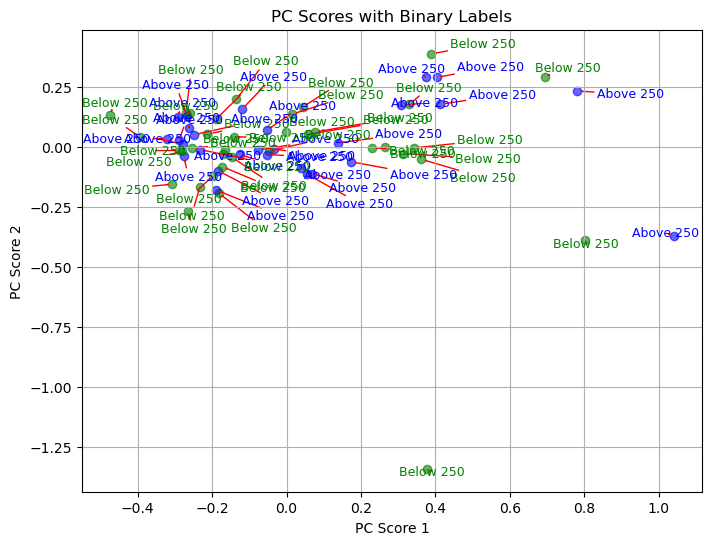

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Function to generate binary labels based on a threshold
def generate_binary_labels(dataframe, threshold=150):
    labels = []
    for column in dataframe.columns[1:]:  # Skip 'Date' column
        # Check if any value in the column exceeds the threshold
        if dataframe[column].max() > threshold:
            labels.append('Above 250')
        else:
            labels.append('Below 250')
    return labels

# Assuming 'tech' and 'nontech' DataFrames are defined earlier
tech_labels = generate_binary_labels(tech_df)

# Function to plot PC scores with binary labels
def plot_pc_scores_with_binary_labels(pc_scores1, pc_scores2, labels, title="PC Scores with Binary Labels"):
    plt.figure(figsize=(8, 6))  # Adjusted for better visibility of labels
    texts = []  # List to store all the text objects for adjust_text
    unique_labels = set(labels)  # Identify unique labels for color differentiation
    colors = ['blue', 'green']  # Colors for each label
    label_color = dict(zip(unique_labels, colors))
    
    for i, label in enumerate(labels):
        plt.scatter(pc_scores1[i], pc_scores2[i], label=label, color=label_color[label], alpha=0.6)
        texts.append(plt.text(pc_scores1[i], pc_scores2[i], label, fontsize=9, color=label_color[label]))
    
    # Use adjust_text to minimize text overlaps, with arrowprops for readability
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
    plt.xlabel('PC Score 1')
    plt.ylabel('PC Score 2')
    plt.title(title)
    plt.grid(True)  # Optional: Adds a grid for better readability
    
    # Create a legend for the labels
    for label, color in label_color.items():
        plt.scatter([], [], label=label, color=color)
    #plt.legend()

    plt.show()

# Assuming calculation of PC scores from earlier example
# tech_pc_score1, tech_pc_score2
# nontech_pc_score1, nontech_pc_score2

# Combine PC scores and binary labels


# Plot the combined PC scores with binary labels
plot_pc_scores_with_binary_labels(unique_pc_score1, unique_pc_score2, tech_labels)


In [120]:

groups = {
    'Cloud Computing': [
       'MSFT','GOOGL','AMZN', 'CRM','ADBE', 'NOW','INTU', 'TWLO','CRWD', 'OKTA', 'DDOG','SNOW','MDB',
                 'VEEV','ZM','SPLK','NET', 'BILL', 'DOCU','BOX', 'ANSS','NTNX', 
                 'PANW', 'CTLT','ESTC', 'FSLY', 'WDAY','TEAM', 
                 'ZS'],
    
    'Hardware and Semiconductors': [
        'AAPL', 'HPQ', 'DELL', 'INTC', 'NVDA', 'AMD', 'TXN', 'QCOM', 'ASML', 
        'MU', 'AMAT', 'SWKS', 'MCHP', 'WDC', 'STM', 'AVGO', 'LRCX', 'TSM', 'ERIC', 
        'GLW', 'JNPR', 'ANET', "NXPI", "MRVL", "ADI", "KLAC", "TER", "KEYS", "FTV",
   'AOSL','SMTC', 'MPWR','CRUS','LSCC','ON'
]
}


group_colors = {
    'Cloud Computing': 'blue',
    'Hardware and Semiconductors': 'green',
}


X = np.column_stack((unique_pc_score1, unique_pc_score2))

# Assuming tech_company_tickers is a list of company tickers in the same order as they appear in X

tech_company_names = list(tech_df.columns[1:])
tech_company_tickers = tech_company_names  # Replace [...] with your actual list of tickers

# Generate a single list of all tickers in the order defined by the groups variable for consistency
ordered_group_tickers = []
for group in groups.values():
    ordered_group_tickers.extend(group)

# Create a mapping of tickers to their group index based on the ordered list
ticker_to_group_index = {ticker: group_idx for group_idx, tickers in enumerate(groups.values()) for ticker in tickers}

# Create labels for each company based on its group, preserving the order of tech_company_tickers
labels = np.array([ticker_to_group_index[ticker] for ticker in tech_company_tickers if ticker in ticker_to_group_index])

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
db_avg = davies_bouldin_score(X, labels)


Text(0, 0.5, 'DB Score')

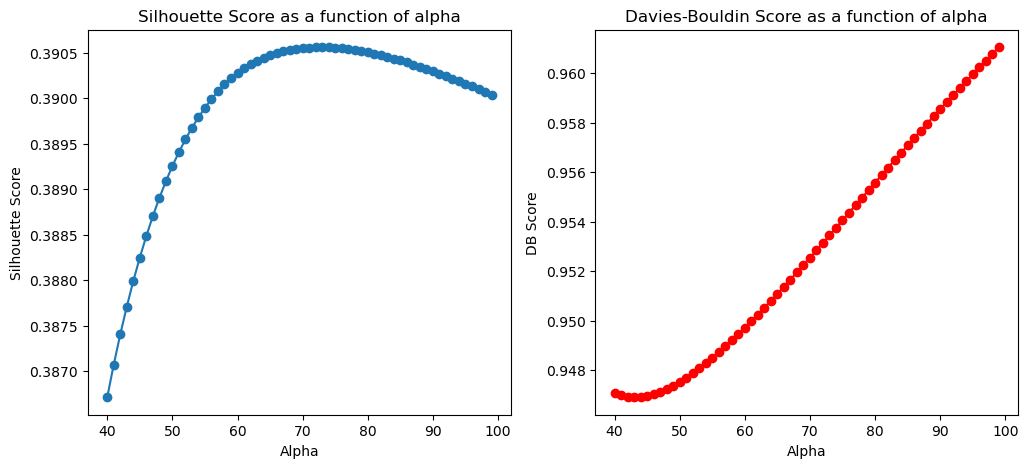

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy.integrate
import skfda

def calculate_pc_scores_from_lists(data_lists, eigenvector, t):
    """
    Calculate the PC scores for each time series represented by a list in data_lists.
    
    Parameters:
    - data_lists: List of lists, each inner list is a time series for a company.
    - eigenvector: The eigenvector to use for calculating PC scores.
    - t: The time array over which to integrate.
    
    Returns:
    - A numpy array with PC scores for each time series.
    """
    # Convert data lists to a numpy array for efficient computation
    data_array = np.array(data_lists)
    
    # Calculate the integral using the trapezoidal rule for each time series
    pc_scores = np.array([simps(data_array[i] * np.real(eigenvector), dx = 1) for i in range(data_array.shape[0])])
    return pc_scores

# Function to compute FPCA components given foreground, background, and alpha
def compute_and_plot_components(foreground, background, alpha):
    t = np.linspace(0, 250, 251)
    fd_X = skfda.FDataGrid(foreground, t)
    fd_Y = skfda.FDataGrid(background, t)
    basis = skfda.representation.basis.BSplineBasis(n_basis=7)
    X_basis = fd_X.to_basis(basis)
    Y_basis = fd_Y.to_basis(basis)

    X_fd_data = fd_X.data_matrix.reshape(fd_X.data_matrix.shape[:-1])
    Y_fd_data = fd_Y.data_matrix.reshape(fd_Y.data_matrix.shape[:-1])

    X_identity = np.eye(len(fd_X.grid_points[0]))
    Y_identity = np.eye(len(fd_Y.grid_points[0]))

    X_weights = scipy.integrate.simpson(X_identity, fd_X.grid_points[0])
    Y_weights = scipy.integrate.simpson(Y_identity, fd_Y.grid_points[0])

    X_weights_matrix = np.diag(X_weights)
    Y_weights_matrix = np.diag(Y_weights)

    X_Lt = np.linalg.cholesky(X_weights_matrix).T
    Y_Lt = np.linalg.cholesky(Y_weights_matrix).T

    new_data_matrix_X = X_fd_data @ X_weights_matrix
    new_data_matrix_X = np.linalg.solve(X_Lt.T, new_data_matrix_X.T).T

    new_data_matrix_Y = Y_fd_data @ Y_weights_matrix
    new_data_matrix_Y = np.linalg.solve(Y_Lt.T, new_data_matrix_Y.T).T

    Vx = (1 / (len(foreground) - 1)) * np.dot(new_data_matrix_X.T, new_data_matrix_X)
    Vy = (1 / (len(background) - 1)) * np.dot(new_data_matrix_Y.T, new_data_matrix_Y)

    eigenvalues, eigenvectors = np.linalg.eig(Vx - alpha * Vy)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    components = np.linalg.solve(X_Lt, sorted_eigenvectors[:, :4]).T

    unique_pc_score1 = calculate_pc_scores_from_lists(foreground, components[0], t)
    unique_pc_score2 = calculate_pc_scores_from_lists(foreground, components[1], t)
    X = np.column_stack((unique_pc_score1, unique_pc_score2))

    return X

alphas = range(40, 100)
silhouette_scores = []
db_scores = []

# Assuming silhouette and Davies-Bouldin score calculation requires clustering or similar, 
# we simulate this step for demonstration purposes
for alpha in alphas:
    X = compute_and_plot_components(standardized_tech_list, standardized_nontech_list, alpha)
    silhouette_avg = silhouette_score(X, labels)
    db_avg = davies_bouldin_score(X, labels)
    
    silhouette_scores.append(silhouette_avg)
    db_scores.append(db_avg)

# Plotting the silhouette and DB scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score as a function of alpha')
plt.xlabel('Alpha')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(alphas, db_scores, marker='o', linestyle='-', color='r')
plt.title('Davies-Bouldin Score as a function of alpha')
plt.xlabel('Alpha')
plt.ylabel('DB Score')
